# Introduction to Statistical Learning ~~in R~~ *(in Python)*
## Chapter 2 Exercises


In [1]:
%matplotlib notebook

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import requests
import io

### Applied 8

This exercise relates to the College data set, which can be found in
the file College.csv. It contains a number of variables for 777 different
universities and colleges in the US. 

In [2]:
college = pd.read_csv(
    io.BytesIO(
        requests.get('http://www-bcf.usc.edu/~gareth/ISL/College.csv').content),
    index_col=0,
    true_values=['Yes'], false_values=['No'])

display(college.head(), college.shape)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,True,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,True,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,True,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,True,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,True,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


(777, 18)

(c) i. produce a numerical summary of the variables in the data set

In [3]:
college.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


(c) ii. Produce a scatterplot matrix of the first ten columns or variables of the data.

<IPython.core.display.Javascript object>


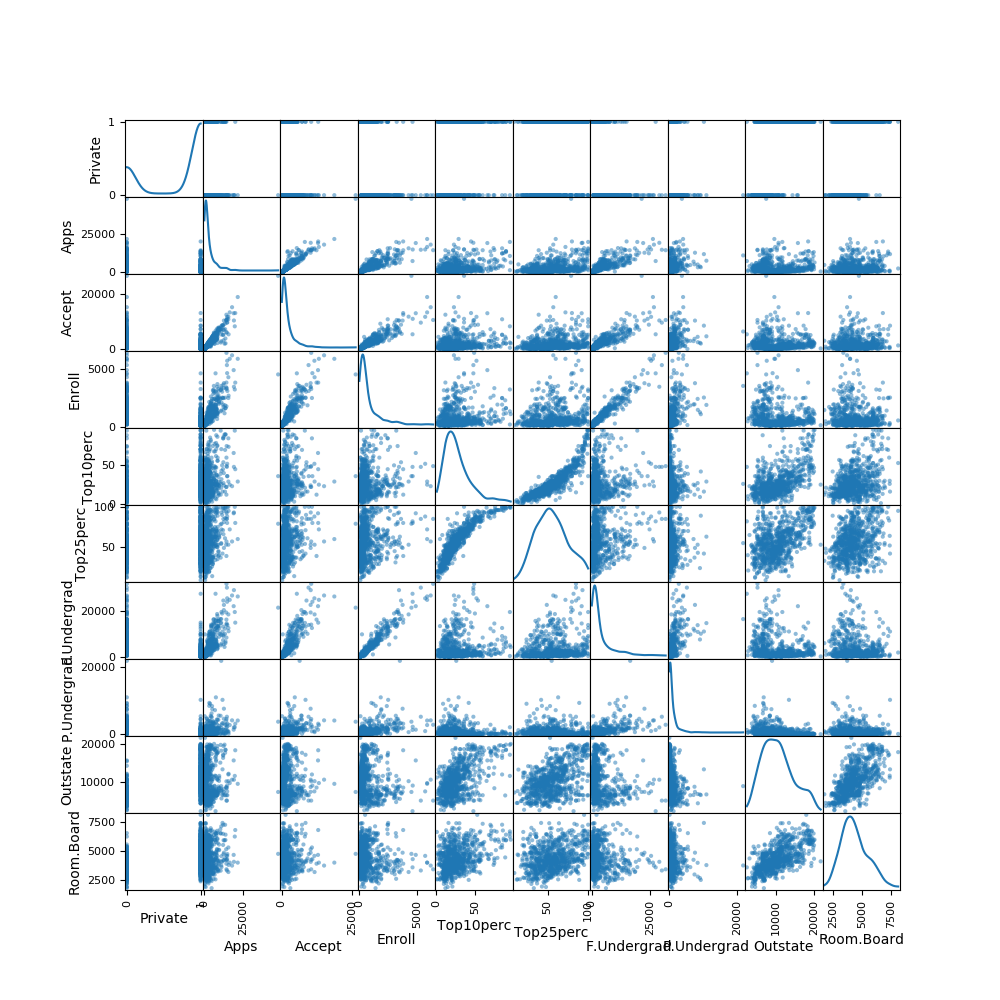

In [4]:
pd.plotting.scatter_matrix(college.iloc[:, :10], figsize=(10, 10), diagonal='kde');

c) iii. produce side-by-side boxplots of Outstate versus Private.

<IPython.core.display.Javascript object>


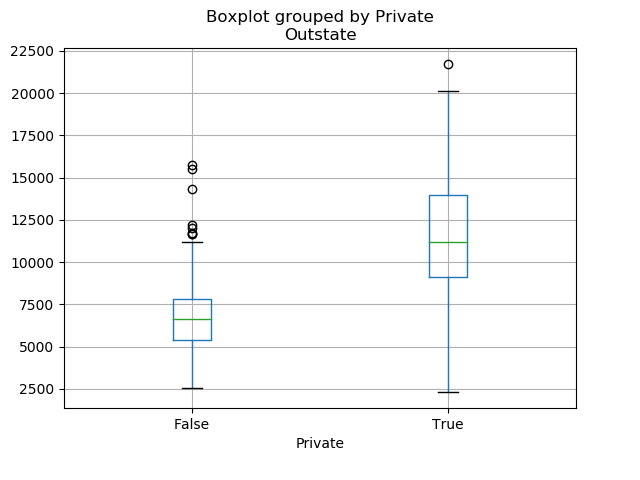

In [5]:
f, ax = plt.subplots()
college.boxplot(column='Outstate', by='Private', ax=ax);

c) iv. Create a new qualitative variable, called Elite, by binning
the Top10perc variable. We are going to divide universities
into two groups based on whether or not the proportion
of students coming from the top 10 % of their high school
classes exceeds 50 %

See how many elite universities there are.

Produce side-by-side boxplots of Outstate versus Elite.

count       777
unique        2
top       False
freq        699
Name: Elite, dtype: object

<IPython.core.display.Javascript object>


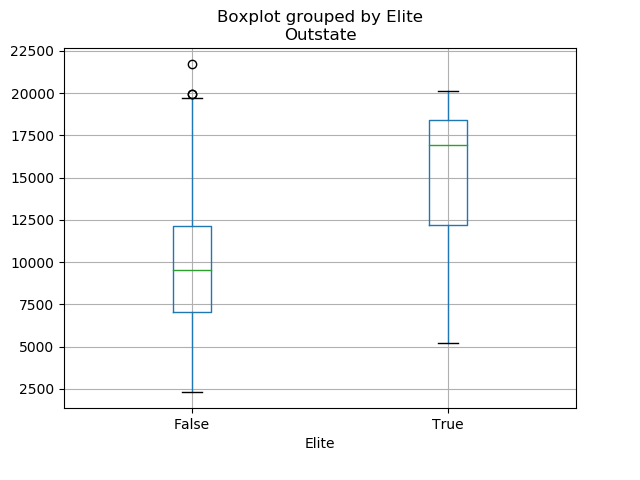

In [6]:
college['Elite'] = college.Top10perc > 50

display(college['Elite'].describe())

f, ax = plt.subplots()
college.boxplot(column='Outstate', by='Elite', ax=ax);

c) v. Produce some histograms with differing numbers of bins for a few of the quantitative variables.

<IPython.core.display.Javascript object>


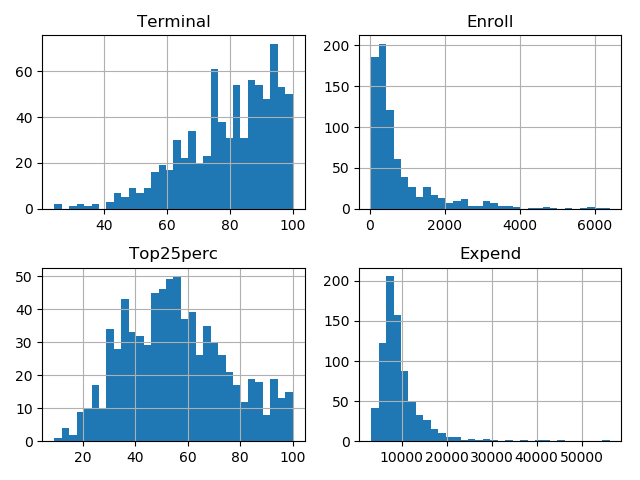

In [7]:
f, axs = plt.subplots(nrows=2, ncols=2, tight_layout=True)

to_show = np.random.choice(college.columns, size=4, replace=False)

for c, ax in zip(to_show, axs.flatten()):
    college.hist(column=c, ax=ax, bins=32);

### Applied 9

This exercise involves the Auto data set studied in the lab. Make sure
that the missing values have been removed from the data.

In [8]:
auto = pd.read_csv(
    io.BytesIO(
        requests.get('http://www-bcf.usc.edu/~gareth/ISL/Auto.csv').content),
    na_values=['?'])

display(auto.head(), auto.shape)

missing = auto[auto.isna().any(axis=1)]
print('Dropping {} observations with missing data:'.format(len(missing)))
display(missing)

auto = auto.dropna()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


(397, 9)

Dropping 5 observations with missing data:


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
32,25.0,4,98.0,NaN,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,2,renault 18i


(a) Which of the predictors are quantitative, and which are qualitative?

In [9]:
auto.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

(b) What is the range of each quantitative predictor

(c) What is the mean and standard deviation of each quantitative
predictor?

In [10]:
auto.describe().loc[['min', 'max', 'mean', 'std']]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518


(d) Now remove the 10th through 85th observations. What is the
range, mean, and standard deviation of each predictor in the
subset of the data that remains?

In [11]:
auto.drop(auto.index[10:85]).describe().loc[['min', 'max', 'mean', 'std']]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
min,11.000000,3.000000,68.000000,46.000000,1649.000000,8.500000,70.000000,1.000000
max,46.600000,8.000000,455.000000,230.000000,4997.000000,24.800000,82.000000,3.000000
mean,24.374763,5.381703,187.880126,101.003155,2938.854890,15.704101,77.123028,1.599369
std,7.872565,1.658135,100.169973,36.003208,811.640668,2.719913,3.127158,0.819308


(e) Using the full data set, investigate the predictors graphically,
using scatterplots or other tools of your choice. Create some plots
highlighting the relationships among the predictors. Comment
on your findings.

(f) Suppose that we wish to predict gas mileage (mpg) on the basis
of the other variables. Do your plots suggest that any of the
other variables might be useful in predicting mpg? Justify your
answer.

<IPython.core.display.Javascript object>


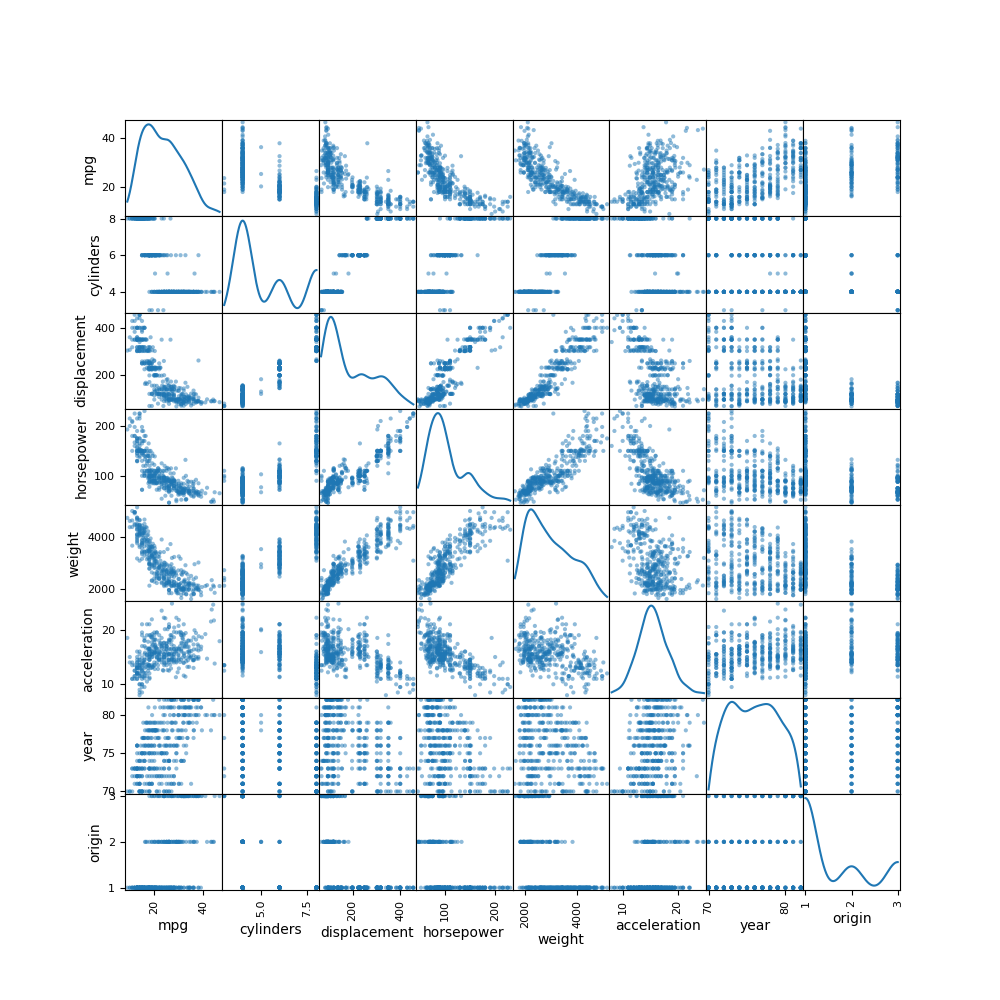

In [12]:
pd.plotting.scatter_matrix(auto, diagonal='kde', figsize=(10, 10));

All of the predictors have an influence on MPG. In particular: displacement, horsepower and weight


<IPython.core.display.Javascript object>


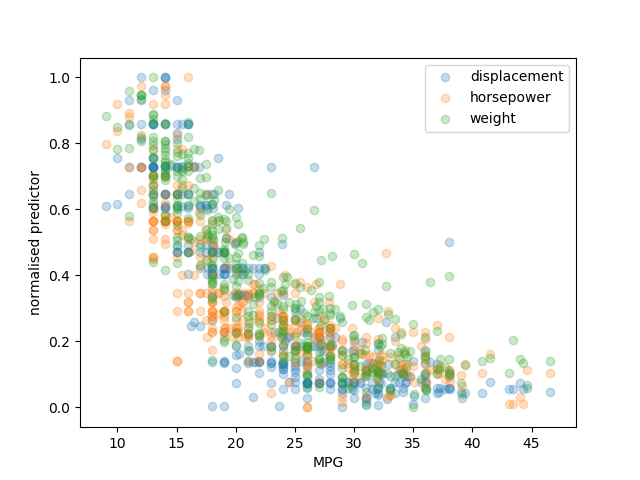

In [13]:
print('All of the predictors have an influence on MPG. In particular: displacement, horsepower and weight')

f, ax = plt.subplots()

for col in ('displacement', 'horsepower', 'weight'):
    ax.scatter(auto.mpg, (auto[col] - auto[col].min()) / (auto[col].max() - auto[col].min()), alpha=.25,
               label='{}'.format(col))

ax.set(xlabel='MPG', ylabel='normalised predictor')
ax.legend();

### Applied 10

This exercise involves the Boston housing data set.

a) To begin, load in the Boston data set. The Boston data set is
part of the MASS library in R

[Description Here](http://stat.ethz.ch/R-manual/R-devel/library/MASS/html/Boston.html)

How many rows are in this data set? How many columns? What
do the rows and columns represent?

In [14]:
boston = pd.read_csv(
    io.BytesIO(
        requests.get('https://vincentarelbundock.github.io/Rdatasets/csv/MASS/Boston.csv').content),
    index_col=0)

display(boston.head(), boston.shape)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


(506, 14)

b) Make some pairwise scatterplots of the predictors (columns) in
this data set. Describe your findings.

<IPython.core.display.Javascript object>


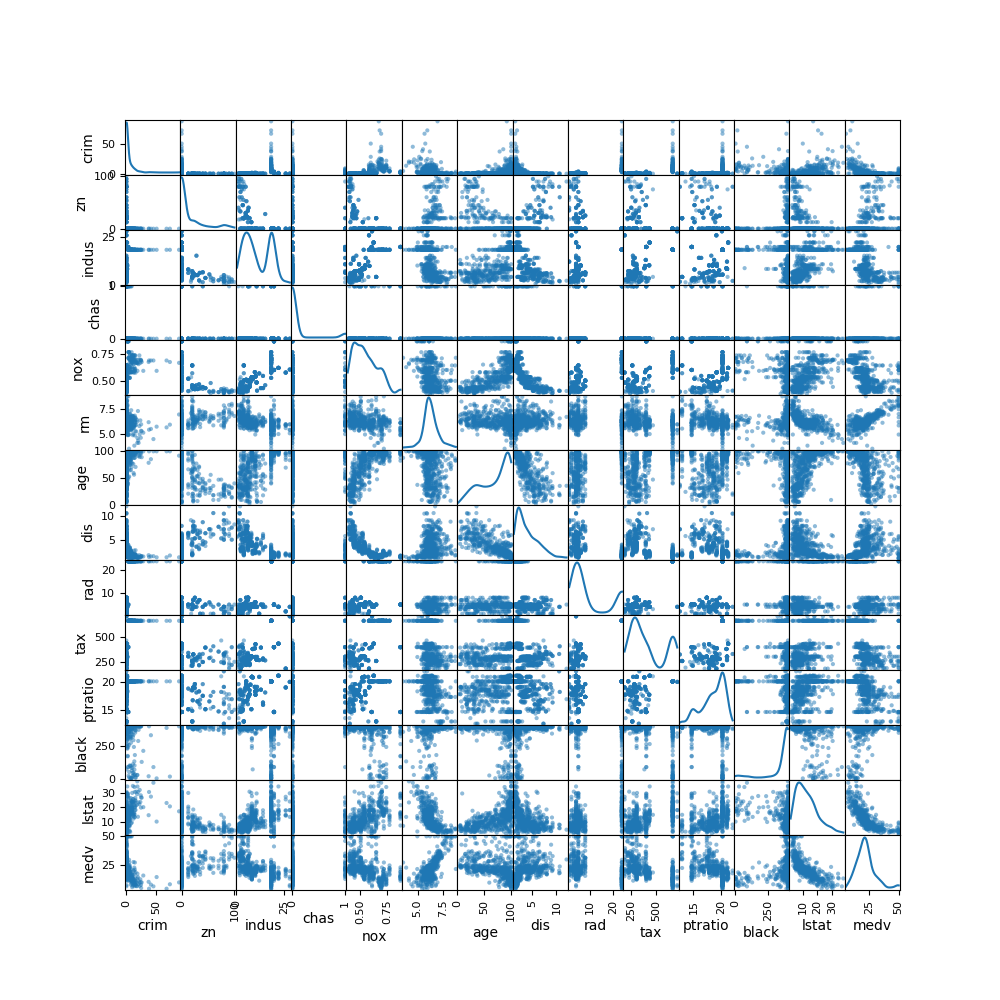

In [15]:
pd.plotting.scatter_matrix(boston, figsize=(10, 10), diagonal='kde');

c) Are any of the predictors associated with per capita crime rate?
If so, explain the relationship

<IPython.core.display.Javascript object>


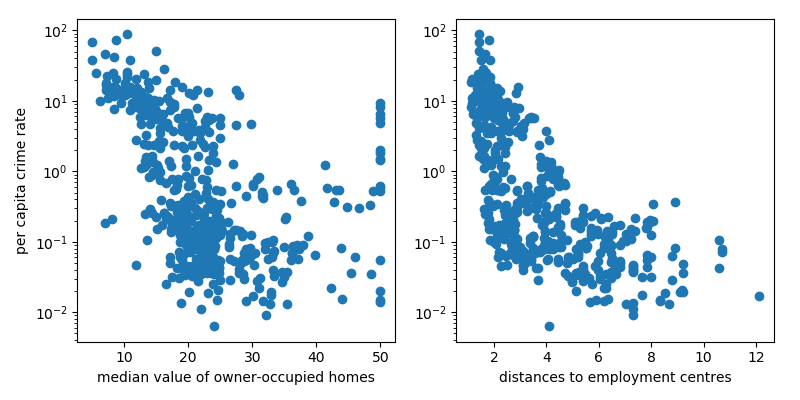

In [16]:
f, axs = plt.subplots(ncols=2, figsize=(8, 4), tight_layout=True)

ax = axs[0]
ax.set(yscale='log')
ax.scatter(boston.medv, boston.crim)
ax.set(ylabel='per capita crime rate', xlabel='median value of owner-occupied homes');

ax = axs[1]
ax.set(yscale='log')
ax.scatter(boston.dis, boston.crim)
ax.set(xlabel='distances to employment centres');

d) Do any of the suburbs of Boston appear to have particularly
high crime rates? Tax rates? Pupil-teacher ratios? Comment on
the range of each predictor.

<IPython.core.display.Javascript object>


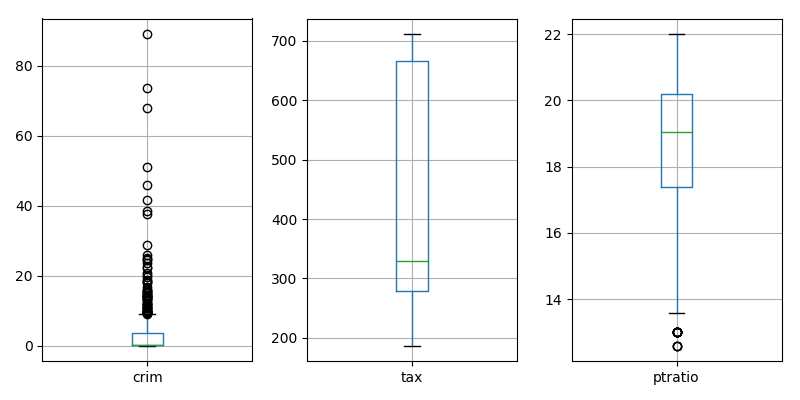

In [17]:
f, axs = plt.subplots(ncols=3, figsize=(8, 4), tight_layout=True)

for c, ax in zip(['crim', 'tax', 'ptratio'], axs):
    boston.boxplot(c, ax=ax)

e) How many of the suburbs in this data set bound the Charles
river?

<IPython.core.display.Javascript object>


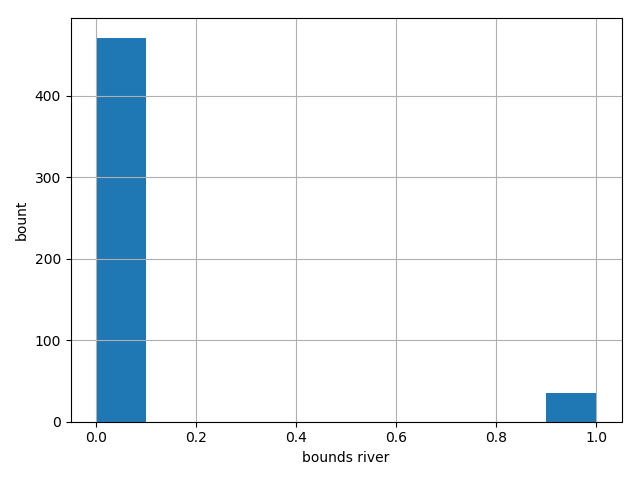

In [18]:
f, ax = plt.subplots(tight_layout=True)
boston.hist('chas', ax=ax)
ax.set(title='', xlabel='bounds river', ylabel='bount');

f) What is the median pupil-teacher ratio among the towns in this
data set?

In [19]:
boston.ptratio.median()

19.05

g) Which suburb of Boston has lowest median value of owner occupied
homes? What are the values of the other predictors
for that suburb, and how do those values compare to the overall
ranges for those predictors? Comment on your findings.

In [20]:
print('Suburb of Boston with lowest median value of owner occupied homes: {}'.format(boston.medv.idxmin()))
display(boston.loc[boston.medv.idxmin()])

print('Percentage rank:')
display(boston.rank(pct=True).loc[boston.medv.idxmin()])

Suburb of Boston with lowest median value of owner occupied homes: 399


crim        38.3518
zn           0.0000
indus       18.1000
chas         0.0000
nox          0.6930
rm           5.4530
age        100.0000
dis          1.4896
rad         24.0000
tax        666.0000
ptratio     20.2000
black      396.9000
lstat       30.5900
medv         5.0000
Name: 399, dtype: float64

Percentage rank:


crim       0.988142
zn         0.368577
indus      0.757905
chas       0.466403
nox        0.844862
rm         0.077075
age        0.958498
dis        0.057312
rad        0.870553
tax        0.860672
ptratio    0.751976
black      0.881423
lstat      0.978261
medv       0.002964
Name: 399, dtype: float64

h) In this data set, how many of the suburbs average more than
seven rooms per dwelling? More than eight rooms per dwelling?
Comment on the suburbs that average more than eight rooms
per dwelling.

In [21]:
print('More than 7: {}  More than 8: {}'.format(np.count_nonzero(boston.rm > 7), np.count_nonzero(boston.rm > 8)))

More than 7: 64  More than 8: 13


<IPython.core.display.Javascript object>


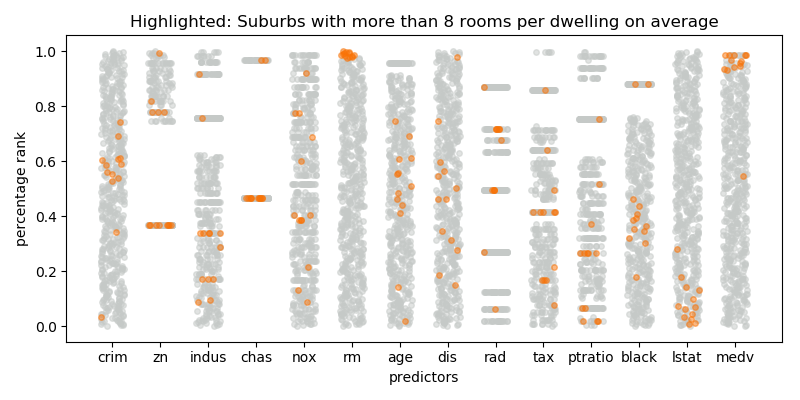

In [22]:
percent_ranks = boston.rank(pct=True)
n = 8

f, ax = plt.subplots(tight_layout=True, figsize=(8, 4))

for mask, color in ((boston.rm <= n, 'xkcd:silver'), (boston.rm > n, 'xkcd:orange')):
    for i, c in enumerate(boston.columns):
        jitter = np.random.random(len(percent_ranks[mask])) * .5 - .25
        ax.scatter(jitter + i, percent_ranks[mask][c], alpha=.5, color=color, s=16)

ax.set(
    title='Highlighted: Suburbs with more than {} rooms per dwelling on average'.format(n),
    xlabel='predictors', ylabel='percentage rank',
    xticks=np.arange(len(boston.columns)), xticklabels=boston.columns);